<a href="https://colab.research.google.com/github/mktcowboy/100_Days_of_Code_Notes/blob/main/HVol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import datetime
import seaborn as sns
import yfinance as yf

In [ ]:
# set ticker
ticker = 'SPY'

# gets all data for ticker
df = yf.download(ticker)

pd.options.display.float_format = '{:.4f}'.format

#making OHLC easier to work with
open = df['Open']
high = df['High']
low = df['Low']
close = df['Adj Close']
volume = df['Volume']

[*********************100%***********************]  1 of 1 completed


In [ ]:
# getting change and log change
df['1d%ch'] = close.pct_change()*100
df['1d%ChLog'] = np.log(close / close.shift(1))
# df['log_return'] = np.log(df['1d.%ch'])

In [ ]:

days = 10

df['vol'] = df['1d%ChLog'].rolling(window=days).std() * np.sqrt(days)

# using NON log change to check to see how far off it is from the other 2
df['vol2'] = close.pct_change().rolling(10).std()

# http://techflare.blog/how-to-calculate-historical-volatility-and-sharpe-ratio-in-python/
df['vol3'] = df['1d%ChLog'].rolling(window=10).std()*np.sqrt(days)

In [ ]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,1d%ch,1d%ChLog,vol,volatility
Date,,,,,,,,,,
2023-02-02,414.8600,418.3100,412.8800,416.7800,416.7800,101654500,1.4557,0.0145,0.0301,0.0301
2023-02-03,411.5900,416.9700,411.0900,412.3500,412.3500,94647400,-1.0629,-0.0107,0.0318,0.0318
2023-02-06,409.7900,411.2900,408.1000,409.8300,409.8300,60295300,-0.6111,-0.0061,0.0320,0.0320
2023-02-07,408.8700,416.4900,407.5700,415.1900,415.1900,90990700,1.3079,0.0130,0.0334,0.0334
2023-02-08,413.1300,414.5300,409.9300,410.6500,410.6500,76227500,-1.0935,-0.0110,0.0364,0.0364
2023-02-09,414.4100,414.5700,405.8100,407.0900,407.0900,78694900,-0.8669,-0.0087,0.0367,0.0367
2023-02-10,405.8600,408.4400,405.0100,408.0400,408.0400,70738000,0.2334,0.0023,0.0367,0.0367
2023-02-13,408.7200,412.9700,408.2400,412.8300,412.8300,64913500,1.1739,0.0117,0.0350,0.0350
2023-02-14,411.2400,415.0500,408.5100,412.6400,412.6400,88249000,-0.0460,-0.0005,0.0326,0.0326


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb01a0ee820>,
      dtype=object)

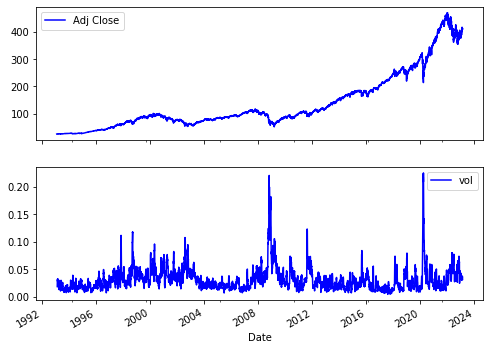

In [ ]:
df[['Adj Close', 'vol']].plot(subplots=True, color='blue',figsize=(8, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb01a174070>,
      dtype=object)

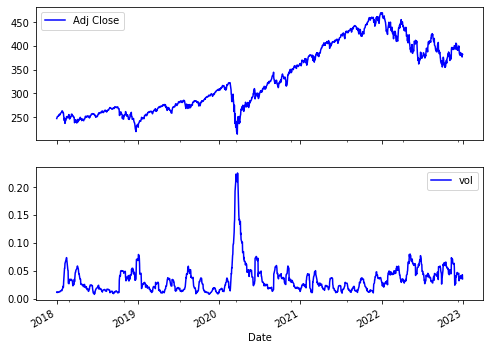

In [ ]:
df2 = df.loc['2018-1-1' : '2022-12-31']
df2[['Adj Close', 'vol']].plot(subplots=True, color='blue',figsize=(8, 6))